## **Human Resources Analysis**

The purpose of this analysis is to study the relationships of various factors in human resources.

I'm still learning how to use Git

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### **Inspection**

In [2]:
# read and inspect data

df = pd.read_csv("C:/Users/trang/Downloads/Practice Datasets/HR Data/hr_dashboard_data.csv")
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [3]:
df.describe() # for qualitative data

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,34.650000,11.455000,46.755000,49.935000,2.883000,76619.245000
std,9.797318,6.408849,28.530068,28.934353,1.123263,27082.299202
min,22.000000,0.000000,0.000000,0.000000,1.000000,30231.000000
25%,26.000000,6.000000,23.000000,25.750000,1.900000,53080.500000
50%,32.000000,11.000000,45.000000,50.500000,2.800000,80540.000000
75%,41.000000,17.000000,70.000000,75.250000,3.900000,101108.250000
max,60.000000,25.000000,98.000000,100.000000,4.900000,119895.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


In [5]:
df.columns

Index(['Name', 'Age', 'Gender', 'Projects Completed', 'Productivity (%)',
       'Satisfaction Rate (%)', 'Feedback Score', 'Department', 'Position',
       'Joining Date', 'Salary'],
      dtype='object')

### **Data Wrangling**

In [6]:
# Find missing or empty values in the dataframe

missing_ages = df['Age'].isna()
for value in missing_ages:
    if value:
        print(value)
    continue
missing_productivity = df['Productivity (%)'].isna()
for value in missing_productivity:
    if value:
        print(value)
    continue


### **EDA**

##### Understanding factors that indicate quality



In [7]:
# create variables from dataframe columns

ages = df['Age']

projectsCompleted = df['Projects Completed']
productivity = df['Productivity (%)']
satisfactionRate = df['Satisfaction Rate (%)']
feedbackScore = df['Feedback Score']

quality_factor = [productivity, satisfactionRate, feedbackScore]

##### Age vs Work Quality

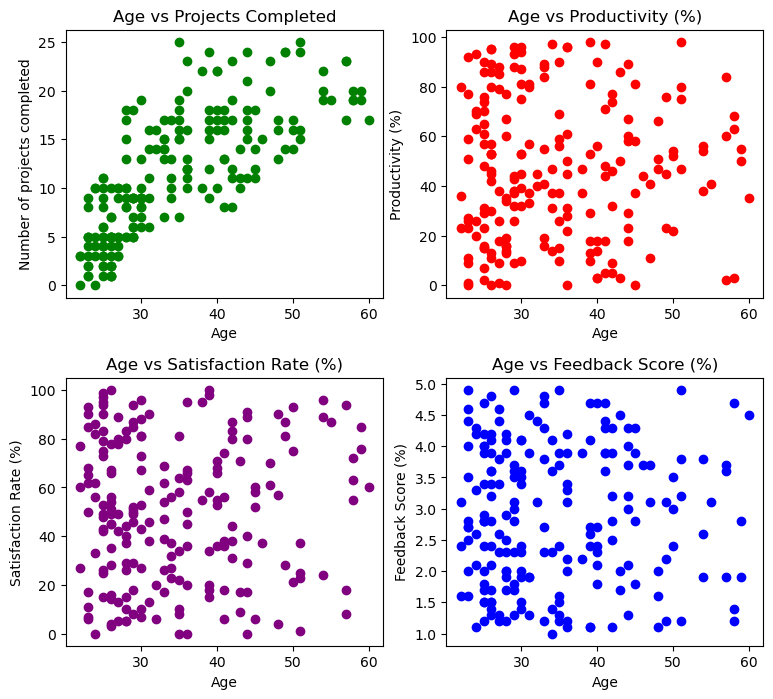

In [23]:
# create subplots
fig = plt.figure(figsize=(9,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plt.subplots_adjust(hspace=0.3)

# age vs projects completed
ax1.scatter(ages,df['Projects Completed'],marker='o', color='green')
ax1.set_title('Age vs Projects Completed')
ax1.set_ylabel('Number of projects completed')

# age vs productivity
ax2.scatter(ages, productivity, color='red')
ax2.set_title('Age vs Productivity (%)')
ax2.set_ylabel('Productivity (%)')

# age vs satisfaction rate
ax3.scatter(ages, satisfactionRate, color='purple')
ax3.set_title('Age vs Satisfaction Rate (%)')
ax3.set_ylabel('Satisfaction Rate (%)')

# age vs feedback score
ax4.scatter(ages, feedbackScore, color = 'blue')
ax4.set_title('Age vs Feedback Score (%)')
ax4.set_ylabel('Feedback Score (%)')

for plot in ax1, ax2, ax3, ax4:
    plot.set_xlabel('Age')

# display plots
plt.show()

#### Quality vs Quantity of Work

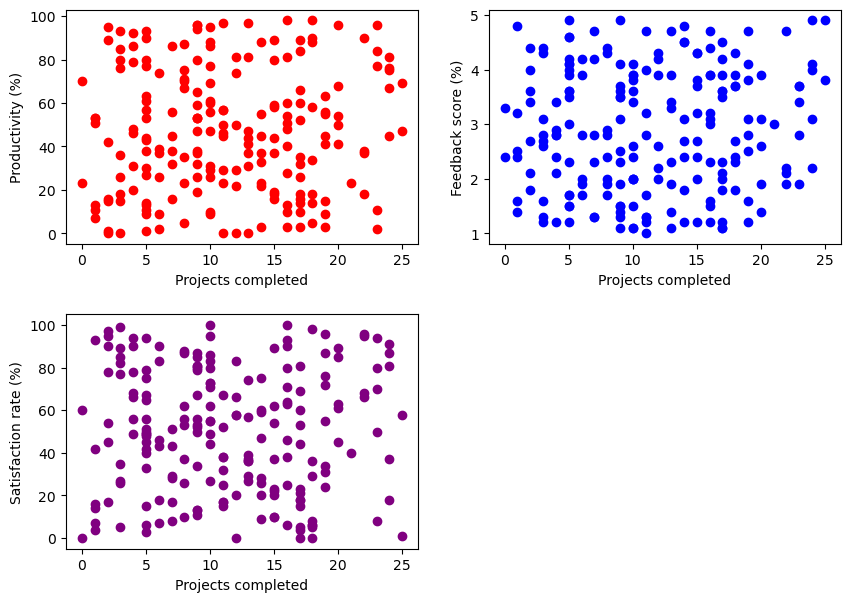

In [9]:
# create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,7))
plt.subplots_adjust(hspace=0.3)

# projects completed vs productivity
ax1.scatter(projectsCompleted, productivity, color='red')
ax1.set_ylabel('Productivity (%)')

# projects completed vs feedback score
ax2.scatter(projectsCompleted, feedbackScore, color='blue')
ax2.set_ylabel('Feedback score (%)')

# projects completed vs satisfaction rate 
ax3.scatter(projectsCompleted, satisfactionRate, color='purple')
ax3.set_ylabel('Satisfaction rate (%)')

ax4.set_visible(False)

for ax in ax1, ax2, ax3, ax4:
    ax.set_xlabel('Projects completed')

plt.show()
 


#### Job titles vs Quality of work

           Position  Productivity (%)  Feedback Score  Satisfaction Rate (%)
0           Analyst         44.545455        2.766667              39.787879
1            Intern         41.333333        2.953333              55.266667
2  Junior Developer         52.314286        2.848571              54.057143
3           Manager         48.675000        3.022500              55.575000
4  Senior Developer         50.233333        2.633333              50.400000
5         Team Lead         42.375000        3.034375              43.406250


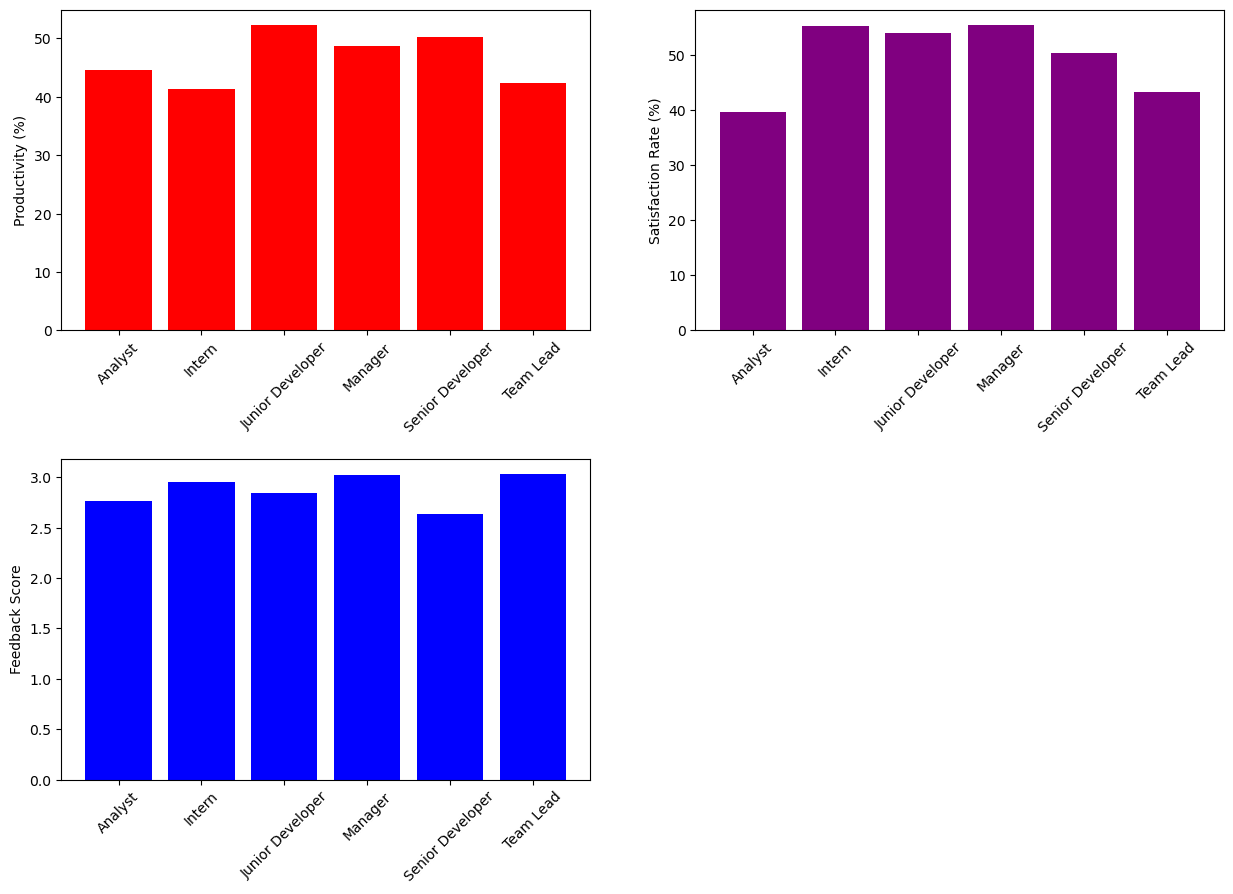

In [10]:
qlty_by_pos = df.groupby('Position')[['Productivity (%)', 'Feedback Score','Satisfaction Rate (%)']].mean().reset_index()
print(qlty_by_pos)
positions = qlty_by_pos['Position'].tolist()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

ax1.bar('Position', 'Productivity (%)', data=qlty_by_pos, color='red')
ax1.set_ylabel('Productivity (%)')

ax2.bar('Position','Satisfaction Rate (%)', data=qlty_by_pos, color='purple')
ax2.set_ylabel('Satisfaction Rate (%)')

ax3.bar('Position','Feedback Score', data=qlty_by_pos, color='blue')
ax3.set_ylabel('Feedback Score')

ax4.set_visible(False)

for ax in [ax1, ax2, ax3]:
    ax.set_xticks(range(len(positions)))
    ax.set_xticklabels(positions,rotation=45)

plt.show()

#### *Gender vs Quality of work*

   Gender  Productivity (%)  Feedback Score  Satisfaction Rate (%)
0  Female             42.97           3.010                  51.25
1    Male             50.54           2.756                  48.62


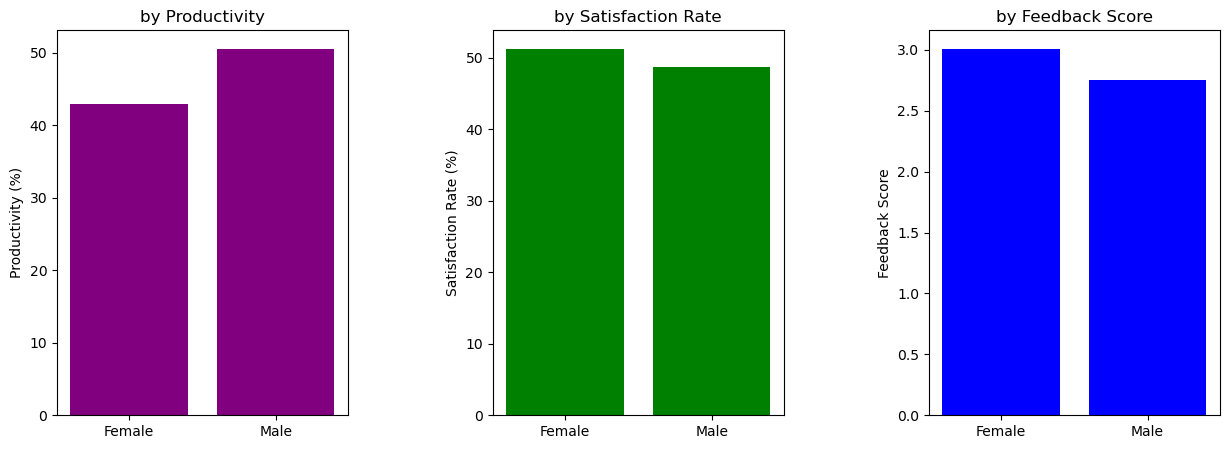

In [15]:
qlty_by_gen = df.groupby('Gender')[['Productivity (%)', 'Feedback Score','Satisfaction Rate (%)']].mean().reset_index()
print(qlty_by_gen)
genders = qlty_by_pos['Position'].tolist()

fig, (fig1, fig2, fig3) = plt.subplots(1,3, figsize=(15,5))
plt.subplots_adjust(hspace=0.3, wspace=0.5)

fig1.bar('Gender', 'Productivity (%)', data=qlty_by_gen, color='purple')
fig1.set_ylabel('Productivity (%)')
fig1.set_title('by Productivity')

fig2.bar('Gender','Satisfaction Rate (%)', data=qlty_by_gen, color='green')
fig2.set_ylabel('Satisfaction Rate (%)')
fig2.set_title('by Satisfaction Rate')

fig3.bar('Gender','Feedback Score', data=qlty_by_gen, color='blue')
fig3.set_ylabel('Feedback Score')
fig3.set_title('by Feedback Score')

#fig4.set_visible(False)

#for fig in [fig1, fig2, fig3]:
    #fig.set_xticks(range(len(genders)))
    #fig.set_xticklabels(genders,rotation=45)

plt.show()

#### *Salary by Job titles*

['Intern', 'Junior Developer', 'Analyst', 'Senior Developer', 'Team Lead', 'Manager']


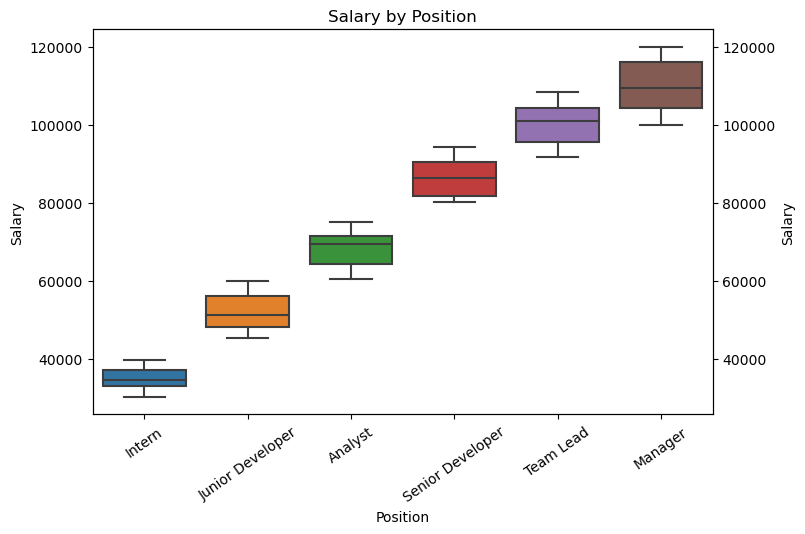

In [21]:
# sort median salary by position
positions = df['Position'].unique()
median_salary_by_position = df.groupby('Position')['Salary'].median().round(2)
sorted_salary_by_position = median_salary_by_position.sort_values().index.tolist()
print(sorted_salary_by_position)

# plotting
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df,x='Position',y='Salary',order=sorted_salary_by_position)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35)
ax.set_xlabel('Position')
ax.set_ylabel('Salary')
ax.set_title('Salary by Position')


ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim()) # Set the limits of the secondary y-axis to match the primary y-axis
ax2.set_ylabel('Salary')

plt.show()

In [13]:
# Department

departments = df['Department'].unique().tolist()

department_position = df.groupby(['Department','Position'])['Salary'].mean()
department_position = department_position.reset_index()
print(department_position)

   Department          Position         Salary
0     Finance           Analyst   67630.111111
1     Finance            Intern   33612.666667
2     Finance  Junior Developer   50552.750000
3     Finance           Manager  109157.454545
4     Finance  Senior Developer   87315.000000
5     Finance         Team Lead  102213.571429
6          HR           Analyst   67520.750000
7          HR            Intern   35739.625000
8          HR  Junior Developer   50577.333333
9          HR           Manager  111176.600000
10         HR  Senior Developer   85522.428571
11         HR         Team Lead   97446.000000
12         IT           Analyst   65825.600000
13         IT            Intern   33450.000000
14         IT  Junior Developer   54073.142857
15         IT           Manager  108379.000000
16         IT  Senior Developer   87440.571429
17         IT         Team Lead  103585.166667
18  Marketing           Analyst   69234.714286
19  Marketing            Intern   34186.333333
20  Marketing